In [58]:
import pandas as pd

def extract(path):
    with open(path, 'r') as f:
        data = f.read()
    data = data.split('\n')

    data = [line for line in data if ('Average change yf M+3' in line or ('Analysing' in line and not 'tickers' in line))]

    returns = {}
    currentYear = None
    for line in data:
        if 'Analysing' in line:
            currentYear = line.split(' ')[-1]
            returns[currentYear] = {}
            continue

        return_value = line.split(': ')[-1]
        # remove %
        return_value = float(return_value[:-1])
        if 'Average change yf M+3:' in line:
            returns[currentYear]['m3'] = return_value
        elif 'Average change yf M+3 (Completed by Compustat data):' in line:
            returns[currentYear]['m3c'] = return_value
        elif 'Average change yf M+3 (If all delisted went bankrupt):' in line:
            returns[currentYear]['m3b'] = return_value

    return returns

extract('output_experiments16_including_otc_1y_sectors.log')

{'2000': {'m3': -90.0, 'm3c': 6216.67, 'm3b': -130.0},
 '2001': {'m3': -78.94, 'm3c': 3052.35, 'm3b': -117.47},
 '2002': {'m3': 1760.17, 'm3c': 20085.02, 'm3b': 354.83},
 '2003': {'m3': -67.53, 'm3c': 1233133.44, 'm3b': -110.39},
 '2004': {'m3': -39.21, 'm3c': 53461.49, 'm3b': -187.84},
 '2005': {'m3': 83.16, 'm3c': 5306.58, 'm3b': -73.12},
 '2006': {'m3': 262.55, 'm3c': 5084.29, 'm3b': -56.53},
 '2007': {'m3': -30.83, 'm3c': 368.22, 'm3b': -104.83},
 '2008': {'m3': 411.85, 'm3c': 1702.1, 'm3b': 3.23},
 '2009': {'m3': -33.19, 'm3c': 13035.65, 'm3b': -126.95},
 '2010': {'m3': -40.4, 'm3c': 5270.03, 'm3b': -117.4},
 '2011': {'m3': 1249.0, 'm3c': 721.28, 'm3b': 537.7},
 '2012': {'m3': 1264.54, 'm3c': 5384.94, 'm3b': 425.81},
 '2013': {'m3': -0.69, 'm3c': 232.77, 'm3b': -111.49},
 '2014': {'m3': -53.28, 'm3c': 3957.83, 'm3b': -104.51},
 '2015': {'m3': 631.03, 'm3c': 389.4, 'm3b': 325.17},
 '2016': {'m3': 427.24, 'm3c': 61078.91, 'm3b': 204.52},
 '2017': {'m3': 126.68, 'm3c': 180.79, 'm3b':

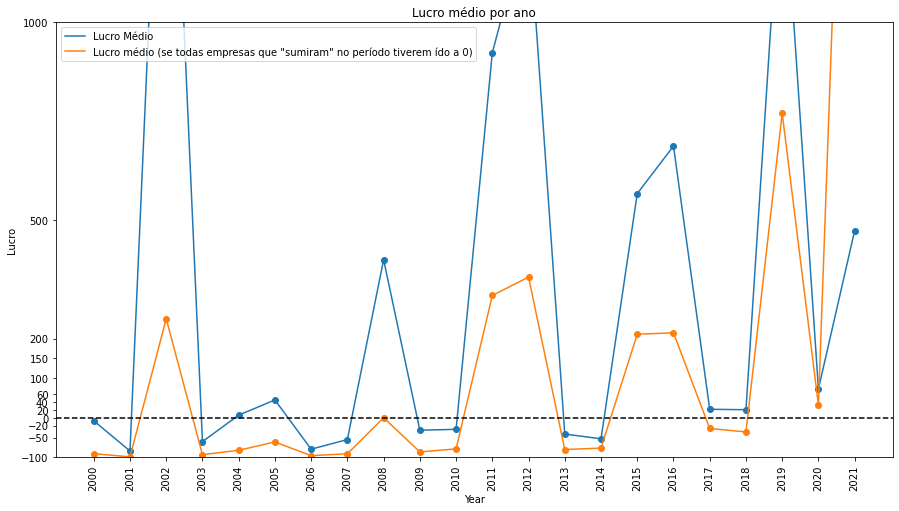

In [61]:
res = extract('output_experiments17_including_otc_1y_sectors_fixed_mb.log')

#plot graph
import matplotlib.pyplot as plt
import numpy as np


x = []
y = []
for year in res:
    x.append(year)
    y.append([
        res[year]['m3'], 
        # res[year]['m3c'], 
        res[year]['m3b'],
    ])

y = np.array(y)
y = y.transpose()
plt.figure(figsize=(15, 8))
plt.title('Lucro médio por ano')
plt.xlabel('Year')
plt.ylabel('Lucro')
plt.plot(x, y[0], label='Lucro Médio')
# plt.plot(x, y[1], label='Lucro Médio (completando pr)')
plt.plot(x, y[1], label='Lucro médio (se todas empresas que "sumiram" no período tiverem ído a 0)')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)

#set y ticks and scale y accordingly
plt.yticks([-100, -50, -20, 0, 20, 40, 60, 100, 150, 200, 500, 1000, 2000, 10000])

# zoom in y
plt.ylim(-100, 1000)

# set a horizontal line on 0
plt.axhline(y=0, color='black', linestyle='--')

# set points
plt.scatter(x, y[0])
plt.scatter(x, y[1])
# plt.scatter(x, y[2])

plt.show()